<a href="https://colab.research.google.com/github/gtm144/Data-Science-Notebooks/blob/master/NLTK_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Natural  Language Processing?


---



Natural Processing Language is one of the AI disciplines. It is the ability of a computer to “understand” and generate human language. If you have a lot of data written in plain text and you want to automatically get some insights from it, you need to use NLP techniques. In this sense, **NLTK Library** is the leading library for building Python programs to implement this task, as Scikitlearn means to machine learning.
![nada](https://cdn-images-1.medium.com/max/1600/1*TURvrYWSTRQLGF6sJ025gw.png)


# NLTK Presentation

Use a Case sample in order to introduce NLTK commands.

### Case Sample / Make a reguetton song from data

Steps to follow using Natural language Processing (NLP)

1.   Create frequency table of words - how many times each word appears in the text using 100 songs.
2.   Remove stop words (defined below) for the analysis.
3.   Assign score to each sentence depending on the words it contains and the frequency table.
4.   Build song by adding every line above a certain score threshold.

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/gtm144/asdf/master/regueton.csv'
df1 = pd.read_csv(url, delimiter="@")
df1

In [0]:
pip install nltk

In [0]:
import nltk
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

In [0]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Preprocess: Tokenize and Data Manipulation

Before any process, first we need to tokenize our text and convert our data to nltk text classes to be able to use this library.

In this case, the text is **tokinize** by words, this means the text is break down in a sequence of strings. This is necessary  because without these basic units clearly segregated it is impossible to carry out any analysis or generation.

After this manipulation, there are basic analysis to make as concordance, common contexts and many others.

In [0]:
from nltk.tokenize import word_tokenize, sent_tokenize
df2 = df1['D-D-D-D-D-DY'].apply(word_tokenize)
texto=[]
for x in df2:
  texto += nltk.Text(x)
text = nltk.Text(texto)

In [0]:
#@title Concordance:  A concordance view shows us every occurrence of a given word, together with some context. { vertical-output: true }

text_a = 'mami' #@param {type:"string"}
text.concordance(text_a)

Displaying 25 of 75 matches:
e ganas me dan-dan-dan De guayarte , mami , ese ram-pam-pam , yeah Esa crimina
e las regla ' , tiene ’ que obedecer Mami , no tiene pausa , ¿que e ’ lo que v
a cuando la faldita esa me la modela Mami , estas enferma , pero tu show no lo
y Me vio con otra y se mordio Dime , mami , ¿que te dio ? Me cago en la madre 
er , y no lo voy a pasar Te juro por mami que en ti no vo ’ a pensar Errores c
e si me esperas sola , solita Creo , mami , que tu cuerpo me necesita Y hacemo
e si me esperas sola , solita Creo , mami , que tu cuerpo me necesita Y hacemo
e si me esperas sola , solita Creo , mami , que tu cuerpo me necesita Y hacemo
e si me esperas sola , solita Creo , mami , que tu cuerpo me necesita Y hacemo
e si me esperas sola , solita Creo , mami , que tu cuerpo me necesita Y hacemo
e si me esperas sola , solita Creo , mami , que tu cuerpo me necesita Y hacemo
) Cuando tu naciste , te maldicieron Mami , Dios bendiga a los doctores Por el
 Me voy a dar una perdi

In [0]:
#@title Common_contexts: Examine just the contexts that are shared by two or more words. { vertical-output: true }
text_b = 'yo' #@param {type:"string"}
text.common_contexts([text_a, text_b])

,_solo ,_dame ,_para


In [0]:
#@title For a string one can select letters, duplicate it or just add another string.
#text_a[:2]
#text_a * 2
#text_a + '!'

'mamimami'

In [0]:
#@title Concanate or split any series of words.
#a = ' '.join([text_a, text_b])
#a
#a.split()

['mami', 'yo']

In [0]:
#@title Apply lower or upper case.
#text_a.lower()
#text_a.upper()

'MAMI'

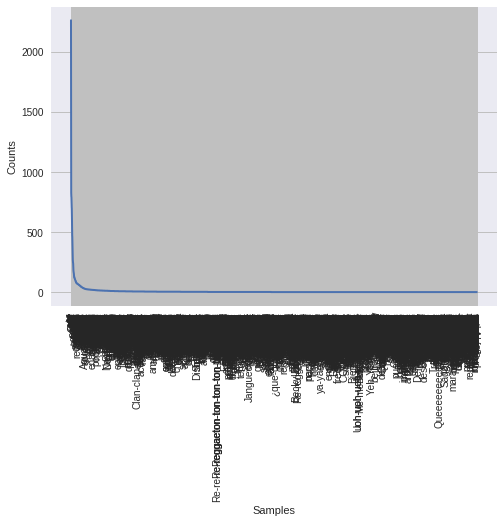

In [0]:
#@title FreqDist: Calculate frequency for each word in a dictionary and show 5 most common words. { vertical-output: true }
fdist1 = FreqDist(text)
#fdist1.most_common(5)
fdist1.plot()

In [0]:
#@title Texto de título predeterminado
freqTable = dict()
for word in text:
    word = word.lower() #Lower Case words
    if word in freqTable:
        freqTable[word] += 1
    else:
        freqTable[word] = 1

freqTable

In [0]:
#@title Collocation: A collocation is a sequence of words that occur together unusually often. Thus una nena is a collocation, whereas nena mala is not. Now, collocations are essentially just frequent a pair of words call bigrams. { vertical-output: true }
#list(bigrams(['Nena', 'tu', 'vas', 'sin', 'freno']))
text.collocations()

Bad Bunny; hasta abajo; otra vez; Nananana ...; ser feliz; voy
enamorando; algun dia; Bien guilla'o; mala mia; ser bichote; Asi
hasta; abajo soy; soy peor; tus ojos; Nicky Jam; los hay; Alguien
robo; siempre quise; Mambo Kingz; Hace mucho


In [0]:
def lexical_diversity(texto): return len(texto) / len(set(texto))
lexical_diversity(text1)
#lexical_diversity(text)

13.502044830977896

In [0]:
from nltk.corpus import stopwords
stopwords.words('portuguese')

In [0]:
import statistics
numbers = [freqTable[key] for key in freqTable]
sd_ = statistics.pstdev(numbers)
sd_

66.46361009820139

In [0]:
freqTable = {k:(0 if v >= sd_ else v) for k,v in freqTable.items()}
freqTable

In [0]:
sent = [[token.lower() for token in sentence] for sentence in df2]

In [0]:
sentenceValue = dict()
for sentence in sent:
    for word, wordValue in freqTable.items():
        if word in sentence:
          if str(sentence) in sentenceValue:
            sentenceValue[str(sentence)] += wordValue
          else:
            sentenceValue[str(sentence)] = wordValue

In [0]:
import ast
for linea in sorted(sentenceValue, key=sentenceValue.get, reverse=True):
  lin = ast.literal_eval(linea)
  te=""
  for pal in lin: te+= pal + " "
  print (te)

( los 14 guerreros ... ) rakim y ken-y ! yeah ... solo yo te pido una noche mas para que te quedes conmigo aqui junto a mi para que vuelvas , baby solo yo te pido una noche mas para que te quedes conmigo aqui junto a mi ya no lo pienses , lady para tocarte , para besarte para sentirte , para mimarte para tocarte , para besarte dame una noche mas mami , tu piel me provoca me hace sentir cosas que yo nunca habia sentido con ninguna otra tu eres mi loba eres la reina de mi corazon la duena , la que por la noche en mi cama conmigo se acuesta la que rie , la que llora la que siempre me anora la que siempre esta conmigo no importa cual sea la hora y es por ti que me desvelo y si tu no estas me muero por eso cuando te tengo cerca me desespero solo yo te pido una noche mas para que te quedes conmigo aqui junto a mi para que vuelvas , baby solo yo te pido una noche mas para que te quedes conmigo aqui junto a mi ya no lo pienses , lady para tocarte , para besarte para sentirte , para mimarte par

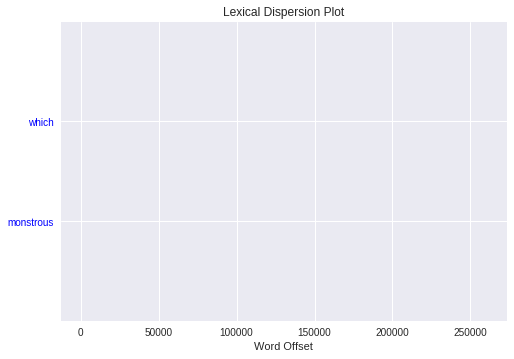

In [0]:
#@title Similar: 
text_a = 'which' #@param {type:"string"}
text1.dispersion_plot(["which", "monstrous"])